In [20]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = '../data/durecdial/'
FILE = 'train_sent_sep.csv'

In [4]:
df = pd.read_csv(PATH + FILE)

In [94]:
def deny(num):
    if num<3:
        return True
    else:
        return False
    
def preprocess(df):
    '''
    dataframe에서 draw_graph에서 필요한 부분만 추출하는 함수
    '''
    temp_df = df[['user_id', 'sentiment_star', 'is_user']].copy()
    temp_df['deny'] = temp_df.sentiment_star.apply(deny)
    temp_df.drop(columns='sentiment_star', inplace=True)
    return temp_df

def draw_graph(df, user_id, with_labels = False, node_size = 400, width = 2, style = None):
    '''
    with_labels(boolean) : node에 index 표시
    node_size(int) : node 크기
    width : edge 두께
    style : 그래프 스타일 ('circular', 'spectral', 'kamada_kawai', 'planar', 'spring', 'shell')

    대화 시작부터 종료까지 길이를 반환
    '''
    G = nx.Graph()

    color_map = []
    before = 0
    flag = False
    cdf = df[df.user_id == user_id]

    for i in range(cdf.shape[0]):
        log = cdf.iloc[i]
        if log.is_user:
            color_map.append('blue')
        else:
            color_map.append('red')
        G.add_node(i)
        if i == 0:
            continue
        if log.is_user:
            G.add_edge(i, i - 1)
            if log.deny:
                flag = True
            else:
                flag = False
                before = i 
        else:
            if flag:
                G.add_edge(i, before)
            else:
                G.add_edge(i, i - 1)
    color_map[0], color_map[-1] = 'black', 'gray'

    options = {
    'node_color': color_map,
    'with_labels' : with_labels,
    'node_size': node_size,
    'width': width,
    }
    match style:
        case 'circular':
            nx.draw
    nx.draw(G, **options)
    plt.show()
    conversation_length = list(nx.shortest_simple_paths(G, 0, 15))[0].__len__()

    return conversation_length

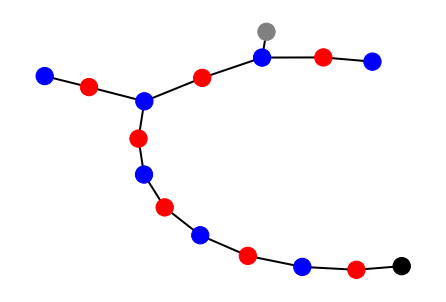

12

In [76]:
prep_df = preprocess(df)
draw_graph(prep_df, 0)

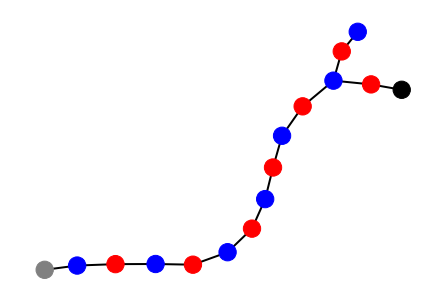

14

In [83]:
draw_graph(prep_df, 8)

In [95]:
G = nx.Graph()

color_map = []
before = 0
flag = False
cdf = preprocess(df)
cdf = cdf[cdf.user_id == 0]

for i in range(cdf.shape[0]):
    log = cdf.iloc[i]
    if log.is_user:
        color_map.append('blue')
    else:
        color_map.append('red')
    G.add_node(i)
    if i == 0:
        continue
    if log.is_user:
        G.add_edge(i, i - 1)
        if log.deny:
            flag = True
        else:
            flag = False
            before = i 
    else:
        if flag:
            G.add_edge(i, before)
        else:
            G.add_edge(i, i - 1)
color_map[0], color_map[-1] = 'black', 'gray'
options = {
    'node_color': color_map,
    # 'with_labels' : with_labels,
    'node_size': 400,
    'width': 2,
}

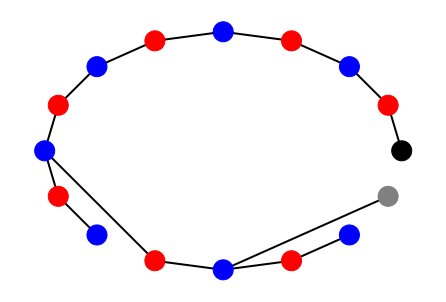

In [96]:
nx.draw_circular(G, **options)
plt.show()

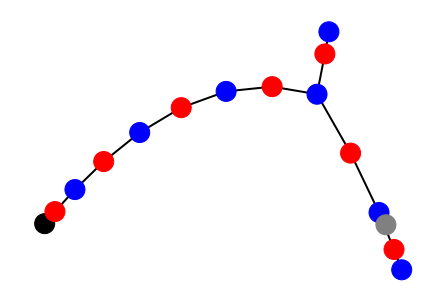

In [97]:
nx.draw_spectral(G, **options)
plt.show()

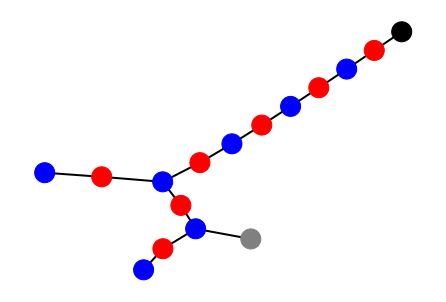

In [98]:
nx.draw_kamada_kawai(G, **options)
plt.show()

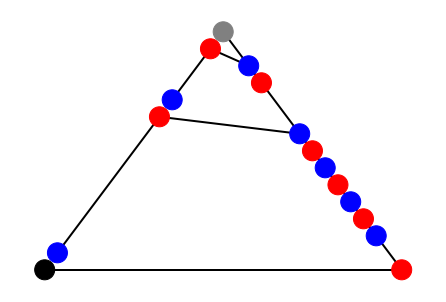

In [99]:
nx.draw_planar(G, **options)
plt.show()

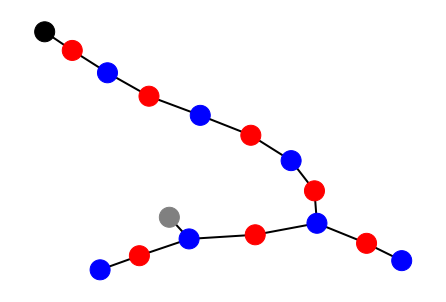

In [100]:
nx.draw_spring(G, **options)
plt.show()

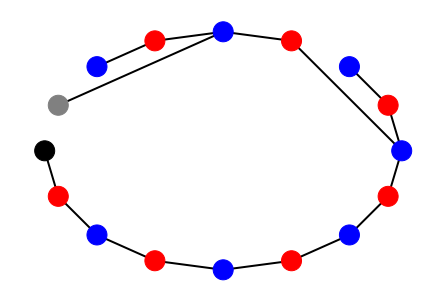

In [101]:
nx.draw_shell(G, **options)
plt.show()